In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# EDA

In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df= df.drop(columns=['Cylinders'], axis=1)

In [6]:
#df= df.drop(columns=['Automatic'], axis=1)

In [7]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [8]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,6.000000,1615.00000


In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace= True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

In [13]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Gears         int64
Weight        int64
dtype: object

In [14]:
df = pd.get_dummies(data= df, columns=['Fuel_Type'], dtype= int)

# Data visualization

In [15]:
#sns.scatterplot(x = df['Automatic'], y = df['Price'])

In [16]:
#sns.pairplot(df)

In [17]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869,-0.039449,0.046612,-0.031356
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484,0.002198,-0.093058,0.088169
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,-0.023969,0.144013,0.407497,-0.437397
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143,0.062203,-0.537116,0.492362
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499,0.001467,-0.084248,0.079997
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077,0.006019,0.326780,-0.314200
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734,0.009761,0.023538,-0.025746
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238,-0.049548,-0.048706,0.063079
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000,0.053530,0.564649,-0.557315
Fuel_Type_CNG,-0.039449,0.002198,0.144013,0.062203,0.001467,0.006019,0.009761,-0.049548,0.053530,1.000000,-0.037964,-0.297688


<AxesSubplot:>

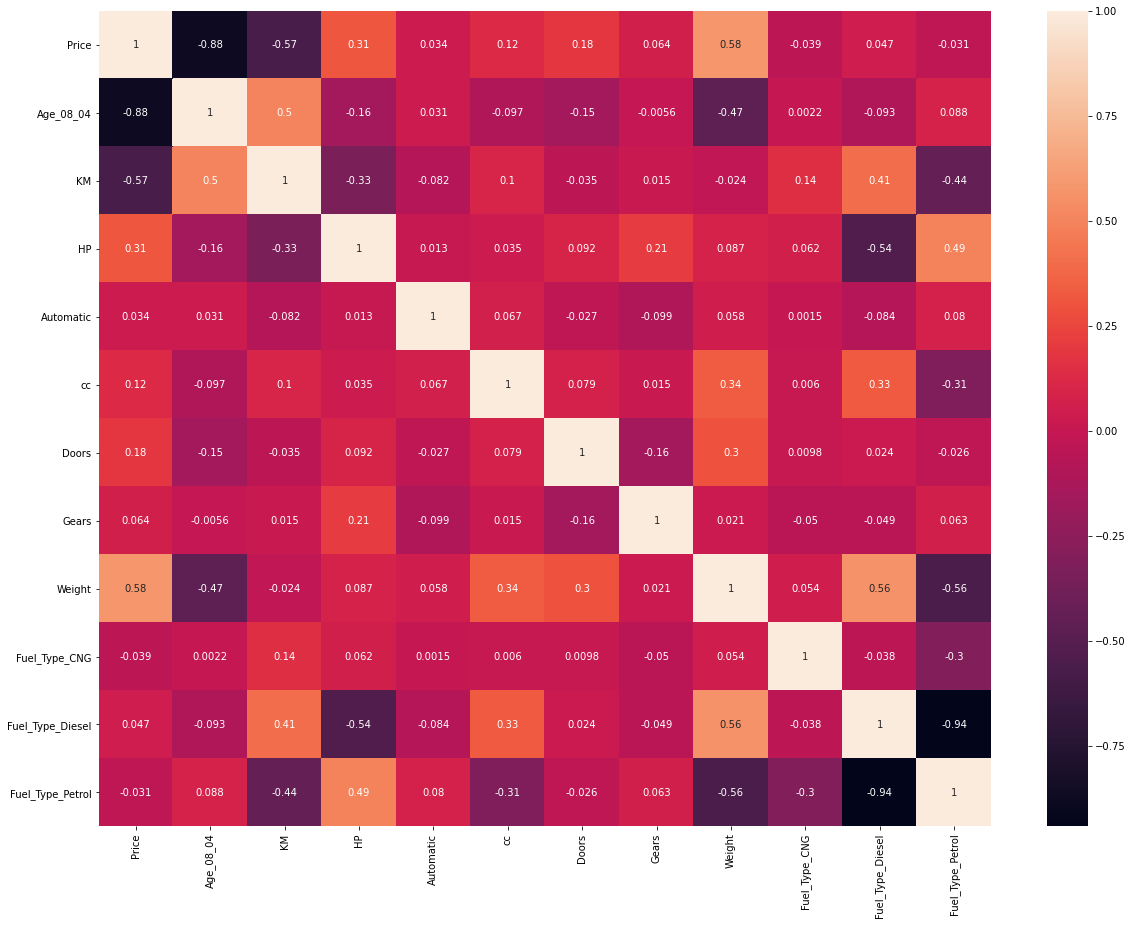

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)


## Model Building

In [19]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0


In [20]:
sc= StandardScaler()
x= df.drop(columns=['Price'])
y= df['Price']

In [21]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,0,1,0
1,23,72937,90,0,2000,3,5,1165,0,1,0
2,24,41711,90,0,2000,3,5,1165,0,1,0
3,26,48000,90,0,2000,3,5,1165,0,1,0
4,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,0,0,1
1432,72,19000,86,0,1300,3,5,1015,0,0,1
1433,71,17016,86,0,1300,3,5,1015,0,0,1
1434,70,16916,86,0,1300,3,5,1015,0,0,1


In [22]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1435, dtype: int64

In [23]:
#x=sc.fit_transform(x)
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,0,1,0
1,23,72937,90,0,2000,3,5,1165,0,1,0
2,24,41711,90,0,2000,3,5,1165,0,1,0
3,26,48000,90,0,2000,3,5,1165,0,1,0
4,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,0,0,1
1432,72,19000,86,0,1300,3,5,1015,0,0,1
1433,71,17016,86,0,1300,3,5,1015,0,0,1
1434,70,16916,86,0,1300,3,5,1015,0,0,1


In [24]:
xtrain, xtest,ytrain, ytest = train_test_split(x,y,train_size=0.8, random_state=41 )

In [25]:
xtrain

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
893,65,60724,86,0,1300,3,5,1015,0,0,1
194,41,123425,69,0,1900,5,5,1140,0,1,0
1176,80,93841,110,0,1600,5,5,1070,0,0,1
40,22,49059,97,0,1400,3,5,1100,0,0,1
823,67,70000,107,1,1587,3,5,1065,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
408,50,102030,97,0,1400,5,5,1060,0,0,1
244,33,57269,110,0,1600,5,5,1075,0,0,1
322,37,36074,110,1,1600,5,5,1075,0,0,1
1105,77,122290,110,0,1600,3,5,1050,0,0,1


In [26]:
ytrain

893      7995
194     13250
1176     9250
40      13950
823     10500
        ...  
408      9950
244     11690
322     13950
1105     7450
932     10350
Name: Price, Length: 1148, dtype: int64

In [27]:
xtest

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
1232,71,83291,110,0,1600,5,5,1070,0,0,1
1276,75,74096,110,0,1600,3,5,1050,0,0,1
595,56,19313,97,0,1400,3,5,1025,0,0,1
1163,78,97534,110,0,1600,5,5,1070,0,0,1
294,42,42560,110,0,1600,5,5,1080,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1224,73,84402,110,0,1600,4,5,1035,0,0,1
237,35,59500,69,0,1900,3,5,1110,0,1,0
654,65,114383,90,0,2000,3,5,1260,0,1,0
242,43,58277,110,0,1600,3,5,1045,0,0,1


In [28]:
ytest

1232     7500
1276     7400
595     10500
1163     8900
294     13950
        ...  
1224     8950
237     13950
654      6950
242     11950
112     24950
Name: Price, Length: 287, dtype: int64

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model=model.fit(xtrain, ytrain)
model

LinearRegression()

In [32]:
ypred= model.predict(xtest).round()

In [33]:
ypred

array([ 8739.,  8066., 10629.,  7598., 13331., 12555., 18329.,  8063.,
       10953., 14028.,  8269.,  7933.,  7978.,  8744.,  6388.,  9443.,
        9552.,  6443.,  9511., 11224.,  8114.,  6126., 12956., 17397.,
       10697.,  6530., 15479., 11411.,  7356., 11590.,  8533., 11225.,
        8630.,  9843.,  8873.,  9097.,  9819., 10498., 12277.,  5463.,
        7659.,  5985., 14033.,  7313.,  9368., 19926.,  9019.,  5710.,
       11013., 16074., 10361.,  8878.,  7400., 10075., 13522., 11964.,
        7157.,  8685., 10558., 13442., 15459.,  7995.,  7343.,  7735.,
        8849., 13730.,  8354.,  7308.,  8421., 10425., 18359.,  9845.,
       16823., 13063.,  8061.,  7845.,  6234.,  9551.,  9407., 10862.,
        9595., 15599., 13670.,  8934., 11068.,  9556.,  7696., 11618.,
        7758.,  8960.,  6423., 12384., 13564., 10028.,  9196.,  8678.,
       10286.,  5749.,  6918.,  7692.,  5794., 10415.,  8640.,  7298.,
        7490., 12313.,  8361.,  8992., 12883., 12752., 11019.,  7277.,
      

In [34]:
ypred.dtype

dtype('float64')

In [35]:
ytest.dtype

dtype('int64')

In [36]:
#ytest=ytest.astype('float64')#

In [37]:
#ypred=pd.DataFrame(ypred)

In [38]:
#coefficients of the model

In [39]:
model.coef_

array([-1.25841400e+02, -1.82683456e-02,  2.63106418e+01,  3.43414518e+02,
       -4.56604264e-02, -2.91594030e+01,  5.95810918e+02,  1.98376489e+01,
       -6.67419544e+02,  2.04897006e+02,  4.62522539e+02])

print("Accuracy:",model.accuracy_score(y_test, 
                                  y_pred)) 

In [40]:
from sklearn.metrics import  r2_score, confusion_matrix, accuracy_score,mean_absolute_error, mean_squared_error

In [41]:
r2_score(ytest,ypred)

0.8027646397024643

In [42]:
confusion_matrix(ytest,ypred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [43]:
accuracy_score(ytest, ypred)

0.0

In [44]:
ytest[:50] == ypred[:50]

1232    False
1276    False
595     False
1163    False
294     False
287     False
153     False
1289    False
504     False
355     False
898     False
761     False
1408    False
666     False
1148    False
698     False
756     False
1052    False
836     False
443     False
1219    False
1156    False
266     False
128     False
416     False
1425    False
79      False
525     False
1069    False
469     False
1165    False
574     False
896     False
978     False
1259    False
1363    False
908     False
434     False
397     False
1065    False
704     False
1103    False
352     False
673     False
787     False
8       False
1427    False
1079    False
537     False
81      False
Name: Price, dtype: bool

In [45]:
mean_absolute_error(ytest,ypred)

1024.9686411149826

In [46]:
mean_squared_error(ytest,ypred)

2002052.0278745645

In [47]:
ytest.dtype

dtype('int64')

In [48]:
confusion_matrix(ytest,ypred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np
 
# Assume you have independent variables X and a dependent variable y
X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])
y = np.array([1, 2, 3, 4])
 
# Create an instance of the LinearRegression class
reg = LinearRegression()
 
# Fit the model to the data
reg.fit(X, y)
 
# Print the coefficients of the model
print(reg.coef_)

[0.33333333 0.33333333 0.33333333]


In [50]:
import statsmodels.formula.api as smf

In [51]:
model = smf.ols('Price~Age_08_04 + KM + HP + Automatic + cc + Doors + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data= df).fit()

In [52]:
model.pvalues

Intercept            2.078738e-09
Age_08_04           1.024567e-292
KM                   5.848015e-37
HP                   9.494286e-11
Automatic            5.967263e-02
cc                   5.718755e-01
Doors                4.648374e-01
Gears                1.561888e-03
Weight               4.221810e-59
Fuel_Type_CNG        5.874275e-11
Fuel_Type_Diesel     1.248249e-06
Fuel_Type_Petrol     1.510642e-06
dtype: float64

In [53]:
model.params

Intercept          -6895.217001
Age_08_04           -123.840430
KM                    -0.017416
HP                    23.314614
Automatic            303.253603
cc                    -0.052021
Doors                -29.884035
Gears                627.081986
Weight                20.706603
Fuel_Type_CNG      -2858.978150
Fuel_Type_Diesel   -2321.979227
Fuel_Type_Petrol   -1714.259624
dtype: float64

In [54]:
model.rsquared

0.8637648551448405

# calculate VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0


In [57]:
data= df.drop(columns=['Price'])

In [58]:
data.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,0,1,0
1,23,72937,90,0,2000,3,5,1165,0,1,0
2,24,41711,90,0,2000,3,5,1165,0,1,0
3,26,48000,90,0,2000,3,5,1165,0,1,0
4,30,38500,90,0,2000,3,5,1170,0,1,0


In [59]:
vif = pd.DataFrame()
vif

""


In [60]:
data.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [61]:
data.dtypes

Age_08_04           int64
KM                  int64
HP                  int64
Automatic           int64
cc                  int64
Doors               int64
Gears               int64
Weight              int64
Fuel_Type_CNG       int32
Fuel_Type_Diesel    int32
Fuel_Type_Petrol    int32
dtype: object

In [62]:
vif['Features']= data.columns
vif

,Features
0,Age_08_04
1,KM
2,HP
3,Automatic
4,cc
5,Doors
6,Gears
7,Weight
8,Fuel_Type_CNG
9,Fuel_Type_Diesel


In [63]:
len(data.columns)

11

In [64]:
data

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,0,1,0
1,23,72937,90,0,2000,3,5,1165,0,1,0
2,24,41711,90,0,2000,3,5,1165,0,1,0
3,26,48000,90,0,2000,3,5,1165,0,1,0
4,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,0,0,1
1432,72,19000,86,0,1300,3,5,1015,0,0,1
1433,71,17016,86,0,1300,3,5,1015,0,0,1
1434,70,16916,86,0,1300,3,5,1015,0,0,1


In [65]:
data.values

array([[   23, 46986,    90, ...,     0,     1,     0],
       [   23, 72937,    90, ...,     0,     1,     0],
       [   24, 41711,    90, ...,     0,     1,     0],
       ...,
       [   71, 17016,    86, ...,     0,     0,     1],
       [   70, 16916,    86, ...,     0,     0,     1],
       [   76,     1,   110, ...,     0,     0,     1]], dtype=int64)

In [66]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [67]:
vif

,Features,VIF
0,Age_08_04,1.911952
1,KM,2.002649
2,HP,2.300692
3,Automatic,1.094619
4,cc,1.223606
5,Doors,1.217072
6,Gears,1.117554
7,Weight,3.254342
8,Fuel_Type_CNG,22.253658
9,Fuel_Type_Diesel,220.363121


In [68]:

wt = smf.ols('Price~ Age_08_04 + KM + HP + Weight   ',data = df).fit()
wt.rsquared

0.8605512516617329

In [69]:
model= smf.ols('Price~Age_08_04 + KM + HP + Weight', data= df).fit()
model.rsquared

0.8605512516617329

In [70]:
import statsmodels.api as sm 

In [71]:
model.fittedvalues

0       16540.061654
1       16031.925820
2       16520.878787
3       16152.795535
4       15940.849441
            ...     
1431     8729.593666
1432     8208.574304
1433     8369.892658
1434     8494.321184
1435    10635.589655
Length: 1435, dtype: float64

In [72]:
model.resid

0      -3040.061654
1      -2281.925820
2      -2570.878787
3      -1202.795535
4      -2190.849441
           ...     
1431   -1229.593666
1432    2636.425696
1433     130.107342
1434   -1244.321184
1435   -3685.589655
Length: 1435, dtype: float64

In [73]:
model.params

Intercept   -3858.755884
Age_08_04    -122.470468
KM             -0.019581
HP             30.202742
Weight         18.384039
dtype: float64

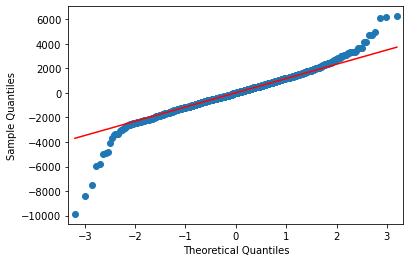

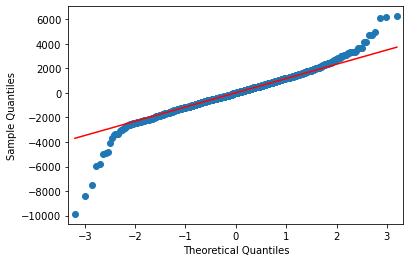

In [74]:
sm.qqplot(model.resid , line= 'q')

In [75]:
np.argmax(model.resid), np.max(model.resid)

(146, 6245.983470211191)

In [76]:
np.argmin(model.resid), np.min(model.resid)

(220, -9862.736197964314)

In [77]:
model

In [78]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [79]:
c

array([4.66219115e-03, 2.74497733e-03, 3.34666041e-03, ...,
       1.11738526e-05, 9.98538338e-04, 1.61804035e-02])

In [80]:
p

array([0.99999561, 0.99999883, 0.99999808, ..., 1.        , 0.99999991,
       0.99990355])

Text(0, 0.5, 'Cooks Distance')

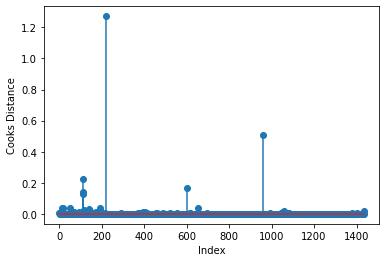

In [81]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [82]:
np.argmax(c), np.max(c)

(220, 1.271326081558192)

In [83]:
df.iloc[[220]]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
221,12450,44,74172,110,0,1600,5,5,1615,0,0,1


In [84]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0


In [85]:
df.drop(index=220,inplace=True)

In [86]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [87]:
df.reset_index(inplace=True)

In [88]:
df

,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1430,1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1431,1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1432,1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [89]:
df.drop(columns=['index'], inplace=True)

In [90]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1430,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1431,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1432,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [91]:
final_model = smf.ols('Price~Age_08_04 + KM + HP + Weight', data = df).fit()

In [92]:
final_model.rsquared

0.8605565245187132

1] What is Normalization & Standardization and how is it helpful?

Normalization:

Normalization is the process of scaling the data in a specific range [0,1].  this technique is usefull when data is present in different range and unit.
Normalization or Min-Max Scaling is used to transform features to be on a similar scale. 

X_new = (X - X_min)/(X_max - X_min)

Standardization:

Standardization transforms data so that it has a mean of 0 and a standard deviation of 1
Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

X_new = (X - mean)/Std

2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more predictor variables in a multiple linear regression model are highly correlated. 
Techniques to Address Multicollinearity:

Remove Highly Correlated Predictors:

Examine the correlation matrix to identify predictors with high correlations (usually above 0.7 or 0.8). If two predictors are highly correlated, consider removing one of them.
Use the Variance Inflation Factor (VIF), which measures the extent of multicollinearity. If a variable has a VIF above 10, it’s a candidate for removal.

Regularization Techniques:

Ridge Regression: Adds a penalty to the size of the coefficients, reducing their values and helping to mitigate multicollinearity by shrinking less important coefficients towards zero.

Lasso Regression: Similar to Ridge Regression, but can force some coefficients to be exactly zero, effectively performing feature selection.

Principal Component Analysis (PCA):

PCA transforms the original correlated features into a new set of uncorrelated features (called principal components), which are linear combinations of the original features. This reduces dimensionality and mitigates multicollinearity, especially when there are many predictors.